# Import data

In [4]:
import pandas as pd

df = pd.read_csv('asset_data.txt', sep=",")

In [2]:
df.head()

,date,close.spy,close.tlt,fed.rate
0,2003-01-02,91.07,86.28,NaN
1,2003-01-03,91.35,86.48,NaN
2,2003-01-06,92.96,86.25,NaN
3,2003-01-07,92.73,86.56,NaN
4,2003-01-08,91.39,86.99,1.2


In [8]:
df.dtypes['date']

dtype('O')

# Convert data type

In [6]:
df.dtypes

date          object
close.spy    float64
close.tlt    float64
fed.rate     float64
dtype: object

In [9]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df.dtypes

date         datetime64[ns]
close.spy           float64
close.tlt           float64
fed.rate            float64
dtype: object

In [12]:
df.tail()

,date,close.spy,close.tlt,fed.rate
2978,2014-11-03,201.77,118.96,NaN
2979,2014-11-04,201.07,119.33,NaN
2980,2014-11-05,202.34,119.16,NaN
2981,2014-11-06,203.15,118.39,NaN
2982,2014-11-07,203.34,119.75,NaN


In [13]:
df.shape

(2983, 4)

Extract only the observations with the federal funds rate available. I am left with weekly data.

In [16]:
(df['fed.rate'].notnull()).head()

0    False
1    False
2    False
3    False
4     True
Name: fed.rate, dtype: bool

In [18]:
df2=df.dropna(axis=0)

Reduced data set

In [19]:
df2.head()

,date,close.spy,close.tlt,fed.rate
4,2003-01-08,91.39,86.99,1.20
9,2003-01-15,92.40,86.40,1.26
13,2003-01-22,88.17,87.88,1.23
18,2003-01-29,86.48,87.17,1.24
23,2003-02-05,84.85,87.51,1.29


In [20]:
df2.shape

(613, 4)

In [21]:
min(df2['date'])

Timestamp('2003-01-08 00:00:00')

In [22]:
max(df2['date'])

Timestamp('2014-10-29 00:00:00')

The start date of the reduced data set is 2003-01-08 and the end date is 2014-10-29.

# Visualization

In [24]:
import matplotlib.pyplot as plt

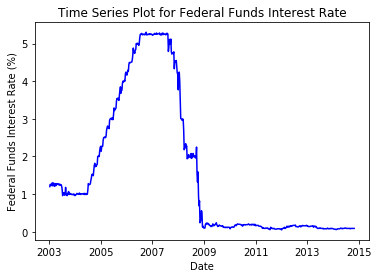

In [30]:
plt.plot(df2['date'], df2['fed.rate'], color = 'blue') 
plt.title('Time Series Plot for Federal Funds Interest Rate')
plt.xlabel('Date')
plt.ylabel('Federal Funds Interest Rate (%)')
plt.show()

The plot presents the federal funds interest rate dynamics throughout the period between January 8th 2013 and October 29th 2014. Before early 2014, the federal funds interest rate flattened out in general and then picked up to 2006 to 2007, remaining above 5% in that period. The federal funds interest rate dropped down for stimulating economy. The rate dropped from above 5% to a level of 0.1% from late 2007 to 2009 affected by the financial crisis resulting in the federal rate dropping to the lowest in 2008. After 2009 to the end date of October 2014, the federal funds interest rate stayed put at around 0.1% after the financial crisis.

# Split the data into training and test sets

The training data will be used to compute our portfolio weights and our test set will be used to evaluate our portfolio.

(a) the training set should contain all observations before 2014 

(b) the test set should contain all observations in 2014.

In [42]:
training = df2[df2['date'] < '2014-01-01']
training.shape

(570, 4)

In [43]:
training.tail()

,date,close.spy,close.tlt,fed.rate
2739,2013-11-20,178.47,102.78,0.09
2744,2013-11-27,181.12,104.42,0.09
2748,2013-12-04,179.73,102.72,0.08
2753,2013-12-11,178.72,103.10,0.09
2758,2013-12-18,181.70,102.77,0.09


In [44]:
test = df2[df2['date'] >= '2014-01-01']
test.shape

(43, 4)

In [45]:
test.head()

,date,close.spy,close.tlt,fed.rate
2771,2014-01-08,183.52,102.58,0.08
2776,2014-01-15,184.66,104.34,0.07
2780,2014-01-22,184.30,105.30,0.07
2785,2014-01-29,177.35,107.87,0.07
2790,2014-02-05,175.17,107.16,0.07


There are 570 observations in the training data set and 43 observations in the test set.